In [2]:
%matplotlib inline
#%matplotlib widget

In [3]:
#############imports######################################################################
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import trackpy as tp
import scipy as sc
import matplotlib.colors as colors
import os
from ipywidgets import HBox, Textarea, interact

In [4]:
def read_time(time_value):
    fps=25
    sign_index=time_value.index(':')
    minutes=int(time_value[0:sign_index])
    sec=int(time_value[sign_index+1:len(time_value)])
    frames=(minutes*60+sec)*25
    return frames
#def expShift(t,A,tau,k):
#    return A*np.exp(-t/tau)+k
def expShift(t,A,tau,k):
    return A*np.exp(-(t**2)/((tau**2)))+k
#def CovToCorr(cov_data):
#    shape=cov_data.shape
#    result=[]
#    for i in range(0,shape):
def powerlaw(x,A,n):
    return A*x**n
def linear_fit_log(x,n,A):
    return n*x+A

In [5]:
expSumFileNamePassive='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged\\expSumPack_botnum_28cm_updated.csv'
expSumPassive=pd.read_csv(expSumFileNamePassive,index_col=0)
all_linked_data_filename='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged\\all_linking_passive_data_28cm.csv'
all_linked_data=pd.read_csv(all_linked_data_filename,index_col=0)
passive_path='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged'
delta_t=6 #seconds
starting_time=100#seconds
ending_time=160#sec
velocity_data=pd.DataFrame()
for index,row in expSumPassive.iterrows():
    FileName=row.linkingFileNamePack
    print(FileName)
    data=all_linked_data[(all_linked_data['Filename']==FileName)]
    data=data.iloc[(starting_time*25):(ending_time*25),0:4]
    first_line=data.iloc[0,:]
    #raw_diff=data-first_line
    raw_diff=data.diff(periods=25*delta_t)
    #delta_r=np.sqrt(np.power(raw_diff.x,2)+np.power(raw_diff.y,2))
    #v_of_center=delta_r/time
    #raw_diff=data.diff(periods=25*delta_t)
    #delta_r=np.sqrt(np.power(raw_diff.x,2)+np.power(raw_diff.y,2))
    #mean_displacment=delta_r.mean(axis=0,numeric_only=True,skipna=True)
    #mean_V= mean_displacment/delta_t
    mean_Vx=raw_diff.x.mean(axis=0,numeric_only=True,skipna=True)/delta_t
    mean_Vy=raw_diff.y.mean(axis=0,numeric_only=True,skipna=True)/delta_t
    row_data=pd.DataFrame()
    row_data['FileName']=[FileName]
    row_data['Bot_Type']=[row.bottype]
    row_data['diameter']=row.bots
    row_data['mean_Vx(per_1sec)']=[mean_Vx]
    row_data['mean_Vy(per_1sec)']=[mean_Vy]
    velocity_data=pd.concat([velocity_data,row_data],axis=0,ignore_index=True)
print(velocity_data)
velocity_data.to_csv(passive_path+'\\mean_velocity(per_1sec)_diameter_28cm.csv')

fronter_N001_D028_C0556.MP4_link.csv
fronter_N001_D028_C0555.MP4_link.csv
updated_test_fronter_N001_D028_C0554.MP4_link.csv
updated_test_fronter_N001_D028_C0553.MP4_link.csv
aligner_N001_D028_C0575.MP4_link.csv
aligner_N001_D028_C0574.MP4_link.csv
aligner_N001_D028_C0573.MP4_link.csv
aligner_N001_D028_C0572.MP4_link.csv
fronter_N004_D028_C0560.MP4_link.csv
fronter_N004_D028_C0559.MP4_link.csv
fronter_N004_D028_C0558.MP4_link.csv
fronter_N004_D028_C0557.MP4_link.csv
aligner_N004_D028_C0580.MP4_link.csv
aligner_N004_D028_C0579.MP4_link.csv
aligner_N004_D028_C0578.MP4_link.csv
aligner_N004_D028_C0577.MP4_link.csv
aligner_N004_D028_C0576.MP4_link.csv
fronter_N008_D028_C0567.MP4_link.csv
fronter_N008_D028_C0566.MP4_link.csv
fronter_N008_D028_C0565.MP4_link.csv
fronter_N008_D028_C0563.MP4_link.csv
fronter_N008_D028_C0562.MP4_link.csv
aligner_N008_D028_C0587.MP4_link.csv
aligner_N008_D028_C0586.MP4_link.csv
aligner_N008_D028_C0585.MP4_link.csv
aligner_N008_D028_C0584.MP4_link.csv
aligner_N008

IndexError: single positional indexer is out-of-bounds

In [23]:
mean_data=velocity_data.groupby(by=["Bot_Type","diameter"]).mean()
std_data=velocity_data.groupby(by=["Bot_Type","diameter"]).std()

C:\Users\User\AppData\Local\Temp\ipykernel_30968\1949981099.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_data=velocity_data.groupby(by=["Bot_Type","diameter"]).mean()
C:\Users\User\AppData\Local\Temp\ipykernel_30968\1949981099.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_data=velocity_data.groupby(by=["Bot_Type","diameter"]).std()


diameter
1     0.121606
4     0.384873
8     0.241103
16    0.699866
21    0.900529
53    1.353130
Name: mean_velocity(per_1sec), dtype: float64
diameter
1     0.258322
4     0.276124
8     0.389642
16    0.466587
21    0.444000
53    0.649407
Name: mean_velocity(per_1sec), dtype: float64


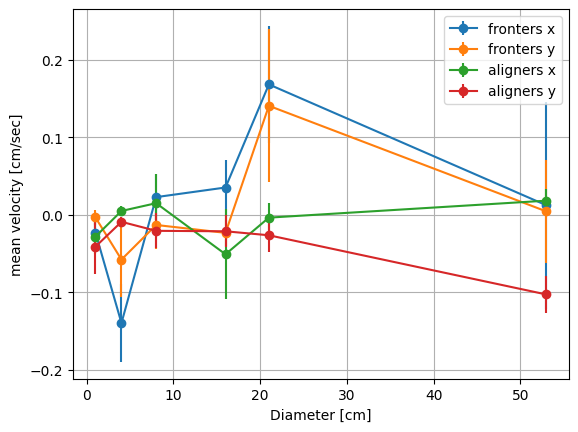

In [24]:
arenaSizePixels = 1090 # [pixels]
arenaSizeCm = 150 # [cm]
mpp = arenaSizeCm/arenaSizePixels
fronter_datax=mean_data.loc[("fronter","mean_Vx(per_1sec)")]
print(fronter_data)
aligner_datax=mean_data.loc[("aligner","mean_Vx(per_1sec)")]
fronter_errx=std_data.loc[("fronter","mean_Vx(per_1sec)")]/2
aligner_errx=std_data.loc[("aligner","mean_Vx(per_1sec)")]/2
fronter_datay=mean_data.loc[("fronter","mean_Vy(per_1sec)")]
fronter_erry=std_data.loc[("fronter","mean_Vy(per_1sec)")]/2
aligner_datay=mean_data.loc[("aligner","mean_Vy(per_1sec)")]
print(aligner_data)
aligner_erry=std_data.loc[("aligner","mean_Vy(per_1sec)")]/2
fig,ax = plt.subplots()
ax.errorbar(x=fronter_data.index,y=fronter_datax*mpp,marker='o',label='fronters x',yerr=fronter_errx*mpp)
ax.errorbar(x=fronter_data.index,y=fronter_datay*mpp,marker='o',label='fronters y',yerr=fronter_erry*mpp)
#ax.plot(fronter_data_max.index,fronter_data_max,'-o',label='fronter_n_max')
ax.errorbar(x=aligner_data.index,y=aligner_datax*mpp,marker='o',label='aligners x',yerr=aligner_errx*mpp)
ax.errorbar(x=aligner_data.index,y=aligner_datay*mpp,marker='o',label='aligners y',yerr=aligner_erry*mpp)
#ax.plot(aligner_data_max.index,aligner_data_max,'-o',label='aligners_n_max')
ax.set_xlabel('Diameter [cm]')
ax.set_ylabel('mean velocity [cm/sec]')
ax.grid()
ax.legend()

diameter
1     0.121606
4     0.384873
8     0.241103
16    0.699866
21    0.900529
53    1.353130
Name: mean_velocity(per_1sec), dtype: float64
diameter
1     0.258322
4     0.276124
8     0.389642
16    0.466587
21    0.444000
53    0.649407
Name: mean_velocity(per_1sec), dtype: float64


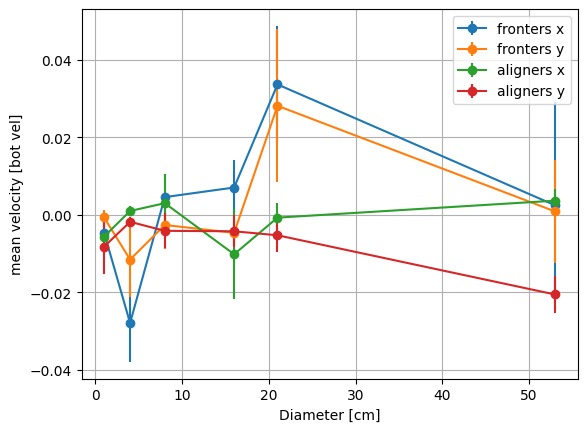

In [25]:
arenaSizePixels = 1090 # [pixels]
arenaSizeCm = 150 # [cm]
mpp = arenaSizeCm/arenaSizePixels
fronter_datax=mean_data.loc[("fronter","mean_Vx(per_1sec)")]
print(fronter_data)
aligner_datax=mean_data.loc[("aligner","mean_Vx(per_1sec)")]
fronter_errx=std_data.loc[("fronter","mean_Vx(per_1sec)")]/2
aligner_errx=std_data.loc[("aligner","mean_Vx(per_1sec)")]/2
fronter_datay=mean_data.loc[("fronter","mean_Vy(per_1sec)")]
fronter_erry=std_data.loc[("fronter","mean_Vy(per_1sec)")]/2
aligner_datay=mean_data.loc[("aligner","mean_Vy(per_1sec)")]
print(aligner_data)
aligner_erry=std_data.loc[("aligner","mean_Vy(per_1sec)")]/2
fig,ax = plt.subplots()
ax.errorbar(x=fronter_data.index,y=fronter_datax*mpp/5,marker='o',label='fronters x',yerr=fronter_errx*mpp/5)
ax.errorbar(x=fronter_data.index,y=fronter_datay*mpp/5,marker='o',label='fronters y',yerr=fronter_erry*mpp/5)
#ax.plot(fronter_data_max.index,fronter_data_max,'-o',label='fronter_n_max')
ax.errorbar(x=aligner_data.index,y=aligner_datax*mpp/5,marker='o',label='aligners x',yerr=aligner_errx*mpp/5)
ax.errorbar(x=aligner_data.index,y=aligner_datay*mpp/5,marker='o',label='aligners y',yerr=aligner_erry*mpp/5)
#ax.plot(aligner_data_max.index,aligner_data_max,'-o',label='aligners_n_max')
ax.set_xlabel('Diameter [cm]')
ax.set_ylabel('mean velocity [bot vel]')
ax.grid()
ax.legend()